In [1]:
import tensorflow as tf
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Regression with Neural Networks

## Keras model building steps

* **Specify Architecture**:
    * How many layers, nodes 
    * Which activation function
* **Compile**:
    * Specifies the loss function 
    * details about how optimization works
* **Fit**:
    * Cycle of backpropagation 
    * Optimization of model weights with the data
* **Predict**

### Specifying Architecture

In [10]:
# iris dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target
n_features = X.shape[1] # 13

# Sequential models require that each layer has 
# weights only to the layer directly after it.
model = Sequential()

* Layers are added with the **.add()** method
* Standard layer is called **Dense**: 
    * all nodes from the previous layer connect to all of the nodes in the current layer.
    * specify **number of nodes**
    * specify which **activation function** is used
    * specify **input_shape** argument for the first layer, e.g. *input_shape=(n_features, )*


In [11]:
# 2 hidden layers
model.add(Dense(units=100, activation='relu', input_shape=(n_features,)))
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(1))

### Compile the model

* Specifying **optimizer**:
    * controls the learning rate 
    * in practice, the right choice of learning rate determines model speed and the quality of weights 
    * a few algorithms that automatically tune the learning rate 
    * a practical choice is to use versatile algorithm and use that for most problems. 
    * Adam' is usually a good choice. 
    * Adam will adjust the learning rate as does gradient decent to insure reasonable values troughout the weight optimization process.
* Specifying **loss function**:
    * 'mean_squared_error' is most common choice for regression problems 
    * for classification there is another default methods

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Fitting a model

* Specify input and target data
* Applies backpropagation and gradient descent with the data to update the weights
* Scaling data before fitting can ease optimization (subtract feature mean from feature and divide by std).

In [13]:
# 'validation_split': Fraction of the training data to be used as validation data.
history = model.fit(x=X, y=y, validation_split=0.25, epochs=10)

Train on 379 samples, validate on 127 samples
Epoch 1/10
379/379 [==============================] - 0s 602us/step - loss: 684.9687 - val_loss: 107.9043
Epoch 2/10
379/379 [==============================] - 0s 59us/step - loss: 180.5226 - val_loss: 264.2167
Epoch 3/10
379/379 [==============================] - 0s 79us/step - loss: 96.3431 - val_loss: 77.4209
Epoch 4/10
379/379 [==============================] - 0s 73us/step - loss: 66.4549 - val_loss: 165.0022
Epoch 5/10
379/379 [==============================] - 0s 70us/step - loss: 62.0584 - val_loss: 123.3560
Epoch 6/10
379/379 [==============================] - 0s 64us/step - loss: 60.4319 - val_loss: 179.9971
Epoch 7/10
379/379 [==============================] - 0s 71us/step - loss: 58.4277 - val_loss: 125.1700
Epoch 8/10
379/379 [==============================] - 0s 137us/step - loss: 57.3683 - val_loss: 173.1938
Epoch 9/10
379/379 [==============================] - 0s 112us/step - loss: 57.3307 - val_loss: 136.4202
Epoch 10/10
37

In [14]:
# model metrics
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


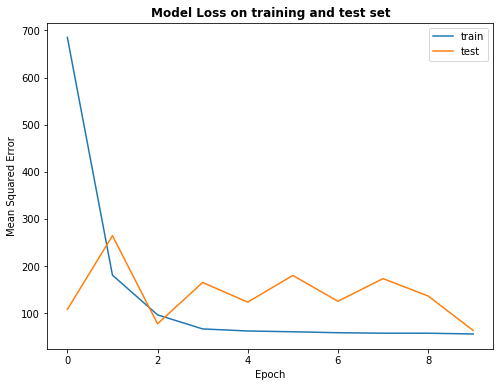

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(['train', 'test'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Model Loss on training and test set', weight='bold')
plt.show()

### Exercise. 

* predict workers wages based on characteristics like their industry, education and level of experience.

In [19]:
wages = pd.read_csv('data/hourly_wages.csv', header=0)
wages.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Standardize education- and experience years
* Concat to original features

In [20]:
# standardize two columns
X_yrs = wages[['education_yrs', 'experience_yrs']].values
X_yrs_scaled = StandardScaler().fit_transform(X_yrs)
yrs = pd.DataFrame(X_yrs_scaled, columns=['education_yrs', 'experience_yrs'])

# concat standardized columns to other features
wages2 = wages.drop(['education_yrs', 'experience_yrs', 'wage_per_hour'], axis='columns')
X = pd.concat([wages2, yrs], axis='columns').values
y = wages.wage_per_hour.values

/home/tonu_ilves/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tonu_ilves/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
# model set-up
model = Sequential([
    Dense(50, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# fittng the model
history = model.fit(x=X, y=y, epochs=5, validation_split=0.25)

Train on 400 samples, validate on 134 samples
Epoch 1/5
400/400 [==============================] - 0s 689us/step - loss: 114.8703 - val_loss: 83.8335
Epoch 2/5
400/400 [==============================] - 0s 80us/step - loss: 30.3999 - val_loss: 39.5078
Epoch 3/5
400/400 [==============================] - 0s 53us/step - loss: 24.9853 - val_loss: 37.0836
Epoch 4/5
400/400 [==============================] - 0s 76us/step - loss: 24.2982 - val_loss: 39.2429
Epoch 5/5
400/400 [==============================] - 0s 48us/step - loss: 23.4000 - val_loss: 41.3191


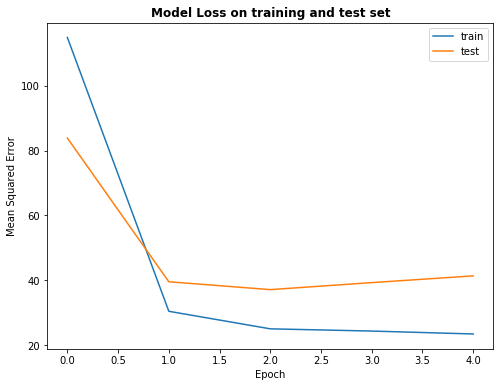

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(['train', 'test'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Model Loss on training and test set', weight='bold')
plt.show()